<a href="https://colab.research.google.com/github/Alleyss/Image_Classification_cifar10/blob/main/Image_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


Load and preprocess the CIFAR-10 dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


Define a Model

In [3]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Train the Model

In [4]:
 #Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.5291 - accuracy: 0.4424 - val_loss: 1.3147 - val_accuracy: 0.5266
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1684 - accuracy: 0.5834 - val_loss: 1.1145 - val_accuracy: 0.5979
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0132 - accuracy: 0.6425 - val_loss: 1.0072 - val_accuracy: 0.6470
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9165 - accuracy: 0.6787 - val_loss: 0.9239 - val_accuracy: 0.6758
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8423 - accuracy: 0.7025 - val_loss: 0.9300 - val_accuracy: 0.6790
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7864 - accuracy: 0.7239 - val_loss: 0.8779 - val_accuracy: 0.6988
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7321 - accuracy: 0.7414 - val_loss: 0.8659 -

Visualize the training history

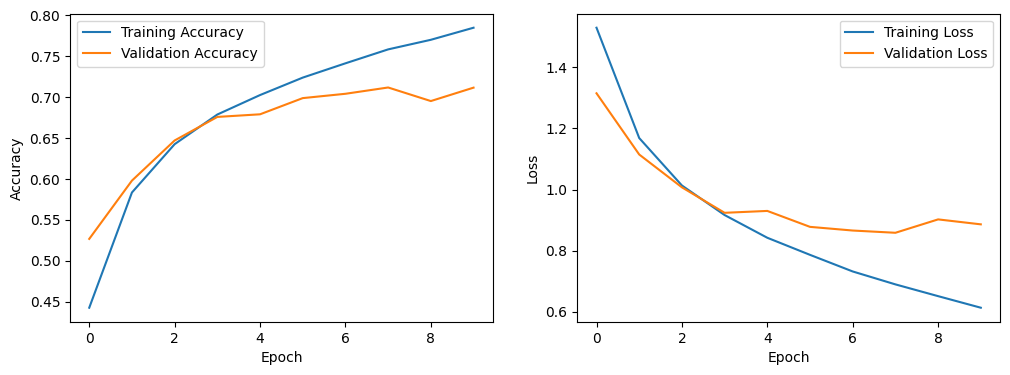

In [5]:
# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

 Evaluate the model on the test set

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

# Make predictions on a few test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 4s 14ms/step - loss: 0.8861 - accuracy: 0.7116
Test Accuracy: 0.7116000056266785
313/313 [==============================] - 3s 10ms/step


Visualize random test images and their predicted labels

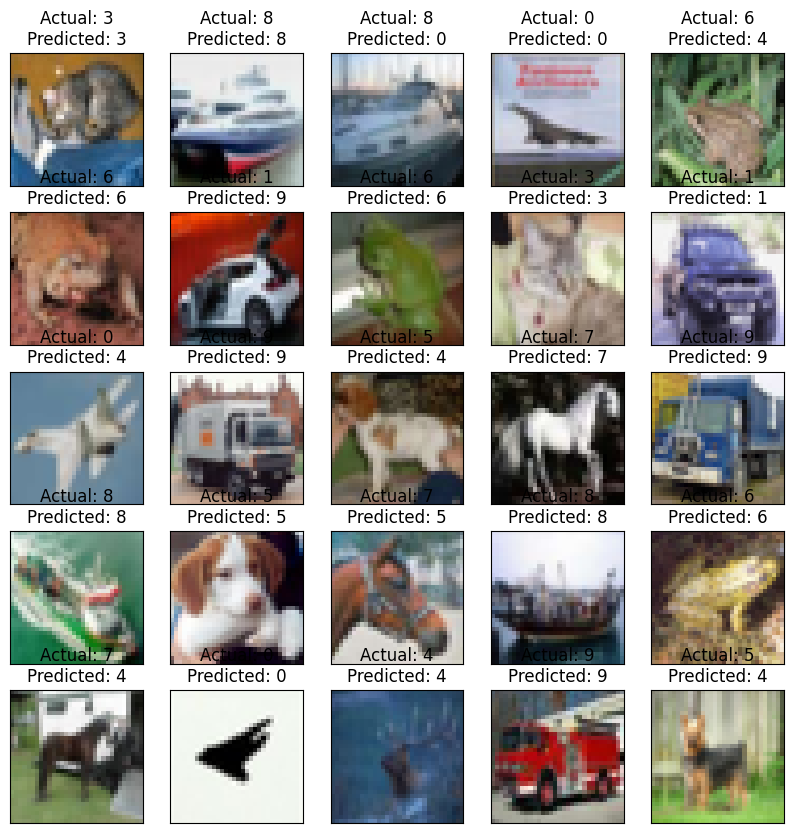

In [7]:
# Visualize random test images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f'Actual: {test_labels[i][0]}\nPredicted: {predicted_labels[i]}')

plt.show()